### EDA - Exploratory Data Analysis

In [1]:
!pip install cufflinks
# Cufflinks is a third-party wrapper library around Plotly

     |████████████████████████████████| 81 kB 10.9 MB/s            
  Preparing metadata (setup.py) ... done
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=67922 sha256=dcacb1f2a44b0b4e9c1d4e677494818e088ed285ac08c3da68f15fa93d3076f9
  Stored in directory: /home/ec2-user/.cache/pip/wheels/1c/db/ce/70cf35eb5a61b9ea3d34434072a8821dddc4f21eb5127e5415
Successfully built cufflinks


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px # it's a wrapper for Plotly.py that exposes a simple syntax for complex charts
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot # Offline version of the Plotly modules.
import cufflinks as cf # Works as a connector between the pandas library and plotly
cf.go_offline() 
init_notebook_mode(connected=True) # To connect Jupyter notebook with JavaScript
from sklearn import metrics

Matplotlib is building the font cache; this may take a moment.


In [4]:
# Read the CSV file 
telecom_df = pd.read_csv("datasets/telecom_churn.csv")
telecom_df.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
0,16,128,415,2845,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,2301,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,1616,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,2510,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,155,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [5]:
telecom_df.shape

(5000, 21)

In [6]:
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          5000 non-null   int64  
 1   account_length                 5000 non-null   int64  
 2   area_code                      5000 non-null   int64  
 3   phone_number                   5000 non-null   int64  
 4   international_plan             5000 non-null   int64  
 5   voice_mail_plan                5000 non-null   int64  
 6   number_vmail_messages          5000 non-null   int64  
 7   total_day_minutes              5000 non-null   float64
 8   total_day_calls                5000 non-null   int64  
 9   total_day_charge               5000 non-null   float64
 10  total_eve_minutes              5000 non-null   float64
 11  total_eve_calls                5000 non-null   int64  
 12  total_eve_charge               5000 non-null   f

array([[<AxesSubplot:title={'center':'state'}>,
        <AxesSubplot:title={'center':'account_length'}>,
        <AxesSubplot:title={'center':'area_code'}>,
        <AxesSubplot:title={'center':'phone_number'}>,
        <AxesSubplot:title={'center':'international_plan'}>],
       [<AxesSubplot:title={'center':'voice_mail_plan'}>,
        <AxesSubplot:title={'center':'number_vmail_messages'}>,
        <AxesSubplot:title={'center':'total_day_minutes'}>,
        <AxesSubplot:title={'center':'total_day_calls'}>,
        <AxesSubplot:title={'center':'total_day_charge'}>],
       [<AxesSubplot:title={'center':'total_eve_minutes'}>,
        <AxesSubplot:title={'center':'total_eve_calls'}>,
        <AxesSubplot:title={'center':'total_eve_charge'}>,
        <AxesSubplot:title={'center':'total_night_minutes'}>,
        <AxesSubplot:title={'center':'total_night_calls'}>],
       [<AxesSubplot:title={'center':'total_night_charge'}>,
        <AxesSubplot:title={'center':'total_intl_minutes'}>,
    

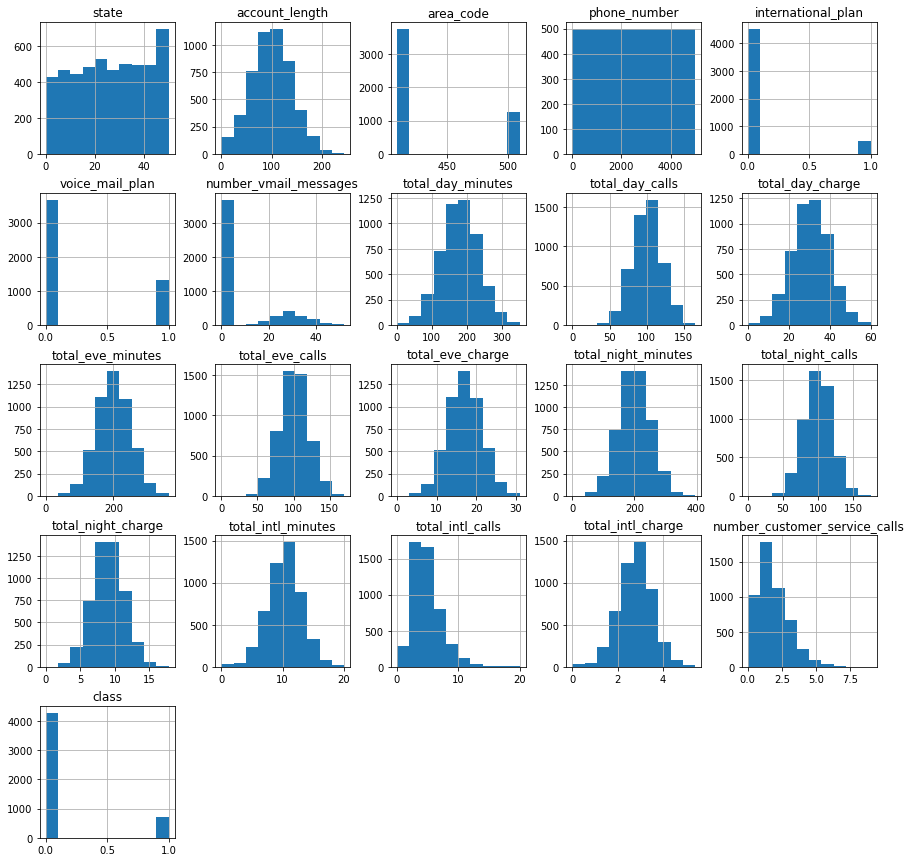

In [9]:
telecom_df.hist(figsize = (15, 15))

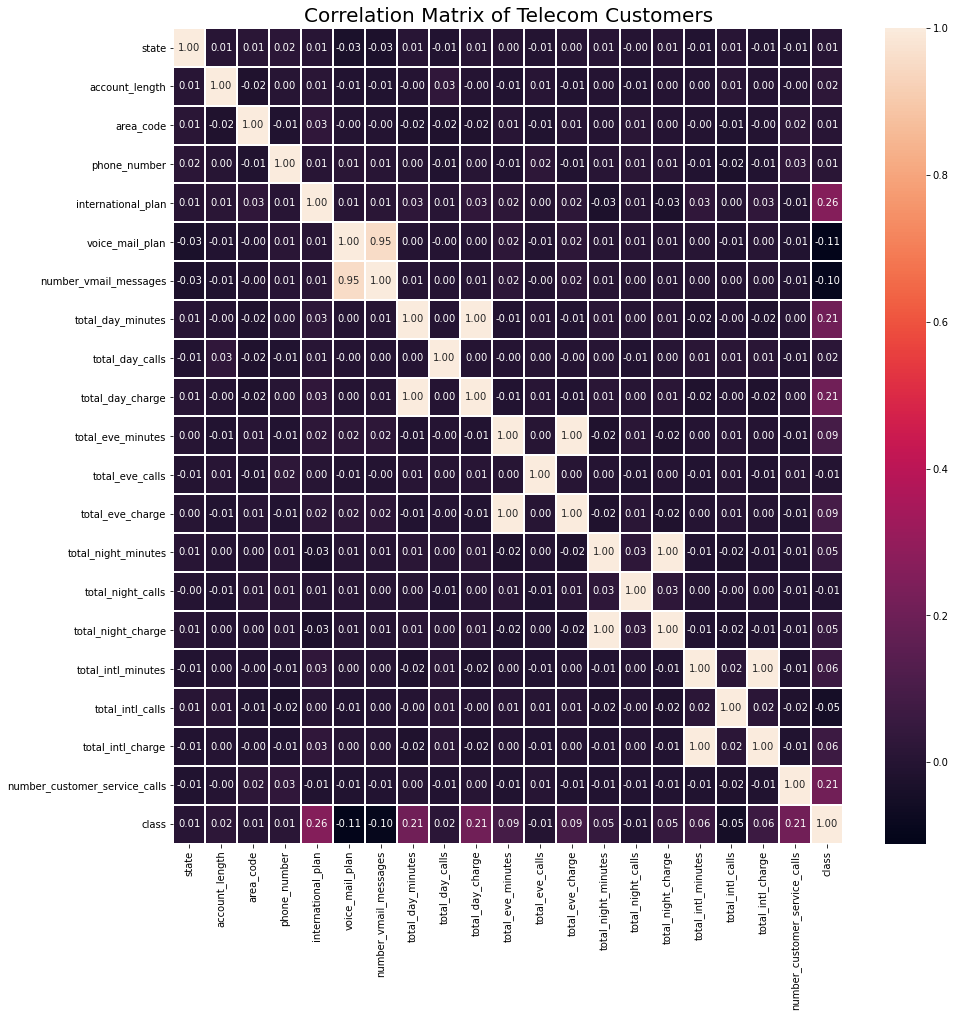

In [12]:
# Correlation Matrix
corr_matrix = telecom_df.corr()
plt.figure(figsize = (15, 15))
cm = sns.heatmap(corr_matrix,
                 linewidths = 1,
                 annot = True, 
                 fmt = ".2f")
plt.title("Correlation Matrix of Telecom Customers", fontsize = 20)
plt.show()

In [19]:
# 0 - customers that stay
# 1 - customers that have left
telecom_df["class"].value_counts()

0    4293
1     707
Name: class, dtype: int64

Text(0.5, 1.0, 'Distribution of day charges by churn')

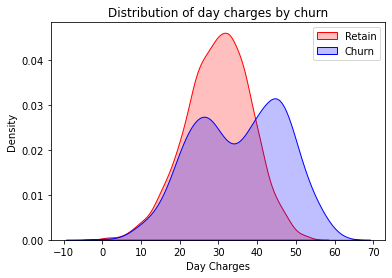

In [13]:
# day charges
# A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analogous to a histogram
ax = sns.kdeplot(telecom_df.total_day_charge[(telecom_df["class"] == 0)], color = "Red", shade = True) # total_day_charge by retain  (customers that stay)
ax = sns.kdeplot(telecom_df.total_day_charge[(telecom_df["class"] == 1)], color = "Blue", shade = True) # total_day_charge by churn (customers that have left)

ax.legend(["Retain", "Churn"], loc = "upper right")
ax.set_ylabel("Density")
ax.set_xlabel("Day Charges")
ax.set_title("Distribution of day charges by churn")

In [ ]:
# It is possible to see that some people that leaves are paying more day charges that people who stay.

Text(0.5, 1.0, 'Distribution of evenning charges by churn')

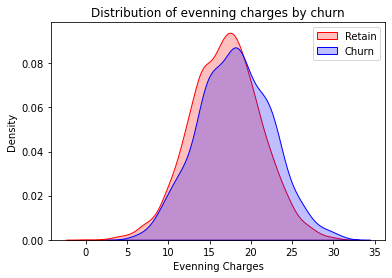

In [31]:
# eve charges
# A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analogous to a histogram
ax = sns.kdeplot(telecom_df.total_eve_charge[(telecom_df["class"] == 0)], color = "Red", shade = True) # total_day_charge by retain  (customers that stay)
ax = sns.kdeplot(telecom_df.total_eve_charge[(telecom_df["class"] == 1)], color = "Blue", shade = True) # total_day_charge by churn (customers that have left)

ax.legend(["Retain", "Churn"], loc = "upper right")
ax.set_ylabel("Density")
ax.set_xlabel("Evenning Charges")
ax.set_title("Distribution of evenning charges by churn")
# It is possible to see that there is not a big difference in the distributions, but some customers that left pay more eve charges

### Preparing train and test datasets

In [24]:
from sklearn.model_selection import train_test_split

In [20]:
x = telecom_df.drop(["class", "area_code", "phone_number"], axis = "columns") # remove unnecessary columns
y = telecom_df["class"]

In [21]:
x.shape

(5000, 18)

In [27]:
y_train.values.ravel()  # returns a contiguous flattened array

array([0, 0, 0, ..., 0, 0, 0])

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 150)

### Random Forest

https://towardsdatascience.com/explaining-feature-importance-by-example-of-a-random-forest-d9166011959e
pros: easy and fast to get feature importances
cons: biased approach, as it has a tendency to inflate the importance of continuous features or high-cardinality categorical variables

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100,
                            oob_score = True,
                            bootstrap = True,
                            random_state = 42)
rf.fit(x_train, y_train.values.ravel())

RandomForestClassifier(oob_score=True, random_state=42)

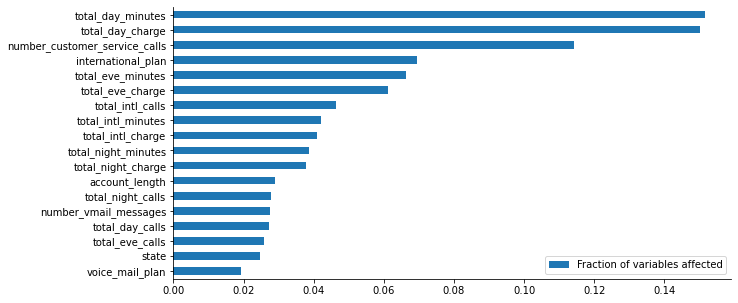

In [37]:
# Plot the feature importance
feat_scores= pd.DataFrame({"Fraction of variables affected" : rf.feature_importances_}, index = x.columns)
feat_scores= feat_scores.sort_values(by = "Fraction of variables affected")
feat_scores.plot(kind = "barh", figsize = (10, 5))
sns.despine() # remove the top and right spines from plot

In [38]:
print('R^2 Training Score: {:.2f} \nOOB Score: {:.2f} \nR^2 Validation Score: {:.2f}'.format(rf.score(x_train, y_train), 
                                                                                             rf.oob_score_,
                                                                                             rf.score(x_test, y_test)))

R^2 Training Score: 1.00 
OOB Score: 0.95 
R^2 Validation Score: 0.96


### Logist Regression

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model_lr = LogisticRegression()
        
model_lr.fit(x_train, y_train)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [40]:
y_predict = model_lr.predict(x_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0])

In [41]:
# precision is the ratio of TP/(TP+FP), what means that it is the ratio between true positives over all positives (including false positives)
# recall is the ratio of TP/(TP+FN), what means that it is the ratio between true positives over all true positives (includes true positives classified as negatives)
# F-beta score can be interpreted as a weighted harmonic mean of the precision and recall
# where an F-beta score reaches its best value at 1 and worst score at 0. 

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1299
           1       0.36      0.06      0.11       201

    accuracy                           0.86      1500
   macro avg       0.62      0.52      0.52      1500
weighted avg       0.80      0.86      0.81      1500



In [ ]:
# the results above show that the model performed badly on class 1...

In [44]:
# confusion matrix (real, predicted)
cm = confusion_matrix(y_test, y_predict)
cm

array([[1276,   23],
       [ 188,   13]])

<AxesSubplot:>

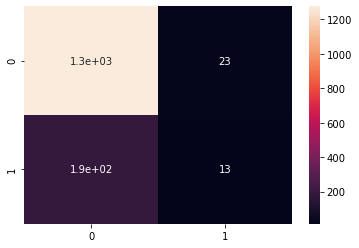

In [45]:
sns.heatmap(cm, annot=True)

### Support Vector Machines (SVM)

In [46]:
# Nesse algoritmo, plotamos cada item de dados como um ponto no espaço
# n-dimensional (onde n é o número de recursos que você tem), com o valor de cada
# recurso sendo o valor de uma determinada coordenada. Então, nós executamos a
# classificação encontrando o hiperplano que melhor diferencia as duas classes.
# Os “Vetores de suporte” são simplesmente as coordenadas da observação
# individual. 
# Support Vector Machine é uma fronteira que melhor segrega as duas classes (hiperplano / linha).
# Maximizar as distâncias entre o ponto de dados mais próximo (de qualquer classe) e o hiperplano nos ajudará a decidir o hiperplano correto. 
# Essa distância é chamada de Margem
# Existem caso onde não é possivel separar as duas classes usando uma linha reta,
# pois uma das classes está no território de outra (outlier). O SVM tem um recurso
# para ignorar valores discrepantes e encontrar o hiperplano que tem margem
# máxima. Portanto, podemos dizer que SVM é robusto para outliers.
# O SVM tem uma técnica chamada truque do kernel (faz algumas transformações para encontrar o hiperplano) usada quando
# nao é possível traçar prontamente um hiperplano linear.
# O SVM não fornece estimativas de probabilidade diretamente
# https://www.inf.ufpr.br/dagoncalves/IA07.pdf

from sklearn.calibration import CalibratedClassifierCV # probability score output
from sklearn.svm import LinearSVC

model_svc = LinearSVC(max_iter=100000)
model_svm = CalibratedClassifierCV(model_svc) 
model_svm.fit(x_train, y_train)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



CalibratedClassifierCV(base_estimator=LinearSVC(max_iter=100000))

In [47]:
y_predict = model_svm.predict(x_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0])

In [48]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.88      0.97      0.93      1299
           1       0.49      0.16      0.25       201

    accuracy                           0.87      1500
   macro avg       0.69      0.57      0.59      1500
weighted avg       0.83      0.87      0.83      1500



In [49]:
cm = confusion_matrix(y_test, y_predict)
cm

array([[1265,   34],
       [ 168,   33]])

<AxesSubplot:>

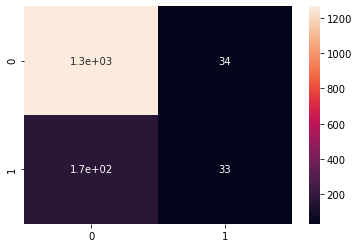

In [50]:
sns.heatmap(cm, annot = True)

### Random Forest for Classification

In [53]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)

RandomForestClassifier()

In [54]:
y_predict = model_rf.predict(x_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0])

In [55]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1299
           1       0.94      0.73      0.82       201

    accuracy                           0.96      1500
   macro avg       0.95      0.86      0.90      1500
weighted avg       0.96      0.96      0.96      1500



In [56]:
cm = confusion_matrix(y_test, y_predict)
cm

array([[1290,    9],
       [  54,  147]])

<AxesSubplot:>

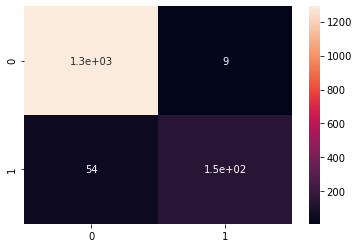

In [57]:
sns.heatmap(cm, annot = True)

### KNN (K-NEAREST NEIGHBOR)

In [59]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()
model_knn.fit(x_train, y_train)

KNeighborsClassifier()

In [61]:
y_predict = model_knn.predict(x_test) 
y_predict

array([0, 0, 0, ..., 0, 0, 0])

In [62]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.89      0.98      0.94      1299
           1       0.67      0.25      0.37       201

    accuracy                           0.88      1500
   macro avg       0.78      0.62      0.65      1500
weighted avg       0.86      0.88      0.86      1500



In [63]:
cm = confusion_matrix(y_test, y_predict)
cm

array([[1274,   25],
       [ 150,   51]])

<AxesSubplot:>

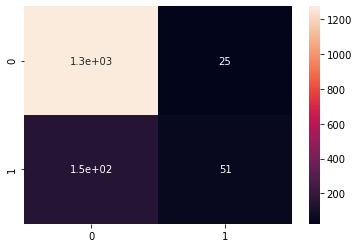

In [64]:
sns.heatmap(cm, annot = True)

### Naives Bayes Classifier

In [66]:
from sklearn.naive_bayes import GaussianNB
model_gnb = GaussianNB()
model_gnb.fit(x_train, y_train)

GaussianNB()

In [67]:
y_predict = model_gnb.predict(x_test)

In [68]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1299
           1       0.53      0.52      0.52       201

    accuracy                           0.87      1500
   macro avg       0.73      0.72      0.72      1500
weighted avg       0.87      0.87      0.87      1500



In [69]:
cm = confusion_matrix(y_test, y_predict)
cm

array([[1206,   93],
       [  97,  104]])

<AxesSubplot:>

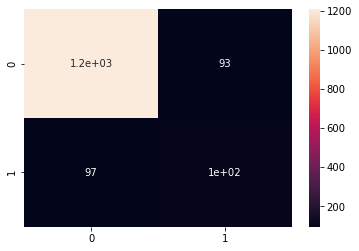

In [70]:
sns.heatmap(cm, annot = True)

## ROC curves

### Logistic Regression

In [72]:
# The first element is the probability that the output will be 0 
# The second element is the probabiliy that the output will be 1
model_lr.predict_proba(x_test)

array([[0.97353564, 0.02646436],
       [0.91891645, 0.08108355],
       [0.9099332 , 0.0900668 ],
       ...,
       [0.92061545, 0.07938455],
       [0.94866691, 0.05133309],
       [0.96510787, 0.03489213]])

In [74]:
# probabiliy that the output will be 1
model_lr.predict_proba(x_test)[:, 1]

array([0.02646436, 0.08108355, 0.0900668 , ..., 0.07938455, 0.05133309,
       0.03489213])

In [78]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# ROC curve (Receiver Operator Characteristics)
# fpr - false positive rate
# tpr - true positive rate
# thresh - threshold
fpr1, tpr1, thresh1 = roc_curve(y_test, model_lr.predict_proba(x_test)[:, 1], pos_label = 1)
fpr2, tpr2, thresh2 = roc_curve(y_test, model_svm.predict_proba(x_test)[:, 1], pos_label = 1)
fpr3, tpr3, thresh3 = roc_curve(y_test, model_rf.predict_proba(x_test)[:, 1], pos_label = 1)
fpr4, tpr4, thresh4 = roc_curve(y_test, model_knn.predict_proba(x_test)[:, 1], pos_label = 1)
fpr5, tpr5, thresh5 = roc_curve(y_test, model_gnb.predict_proba(x_test)[:, 1], pos_label = 1)

In [79]:
# ROC-AUC score (AUC: Area Under the Curve)
# The higher score, the best

auc_score1 = roc_auc_score(y_test, model_lr.predict_proba(x_test)[:, 1])
auc_score2 = roc_auc_score(y_test, model_svm.predict_proba(x_test)[:, 1])
auc_score3 = roc_auc_score(y_test, model_rf.predict_proba(x_test)[:, 1])
auc_score4 = roc_auc_score(y_test, model_knn.predict_proba(x_test)[:, 1])
auc_score5 = roc_auc_score(y_test, model_gnb.predict_proba(x_test)[:, 1])

print("Logistic Regression: ", auc_score1) # Logistic Regression
print("Support Vector Machine: ", auc_score2) # Support Vector Machine
print("Random Forest: ", auc_score3) # Random Forest
print("K-Nearest Neighbors: ", auc_score4) # K-Nearest Neighbors
print("Naive Bayes: ", auc_score5) # Naive Bayes

Logistic Regression:  0.6960731370093337
Support Vector Machine:  0.8085170758984139
Random Forest:  0.9143830501074306
K-Nearest Neighbors:  0.6563123566156898
Naive Bayes:  0.8270158062650564


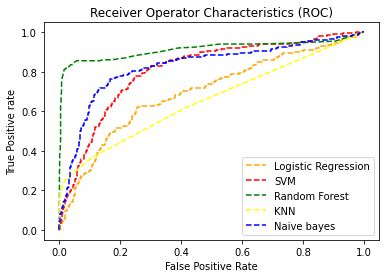

In [82]:
plt.plot(fpr1, tpr1, linestyle = "--", color = "orange", label = "Logistic Regression")
plt.plot(fpr2, tpr2, linestyle = "--", color = "red", label = "SVM")
plt.plot(fpr3, tpr3, linestyle = "--", color = "green", label = "Random Forest")
plt.plot(fpr4, tpr4, linestyle = "--", color = "yellow", label = "KNN")
plt.plot(fpr5, tpr5, linestyle = "--", color = "blue", label = "Naive bayes")

plt.title('Receiver Operator Characteristics (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc = 'best')
plt.savefig('ROC', dpi = 300)
plt.show()

Random Forest algorithm produced the best AUC. So, Random Forest model did a better job of classifying the customers.